In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.impute import MissingIndicator # Es una función que permite identificar los datos faltantes
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime
from numpy import NaN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder # Librería donde está el método One-Hot Encoder
from scipy.stats import fisher_exact # Test exacto de Fisher
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans # Algoritmo KMeans
from sklearn.metrics import silhouette_score,  silhouette_samples
from yellowbrick.cluster import KElbowVisualizer

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## BASE DE DATOS

Se tiene la información mes a mes en Google Drive, se procede a armar la base datos completa 

In [3]:
dir = '/content/drive/MyDrive/content/B_D/'

df = None

años = ['2022']
meses = ['07','08','09','10','11','12']

for i in (años):
  for j in (meses):
    try:
      #dfu = pd.read_csv(f"{dir}{i}{j}.csv", low_memory=False, encoding='latin-1', dayfirst=True, parse_dates=True, index_col=[0]).reset_index()
      dfu = pd.read_csv(f"{dir}{i}{j}.csv", low_memory=False, encoding='latin-1', decimal=".")
      df = pd.concat([df,dfu])
    except:
      pass


In [4]:
df.head()

,Fecha,Nro documento,Estado movto.,Bodega,Item,Desc. item,CLASIFICACION VENTAS PESOS,CLASIFICACION ROTACION UNIDADES,U.M.,Cant. pedida,...,Depto,Desc depto,Ciudad,Desc. ciudad,Barrio,Desc. Barrio,Razón social cliente despacho,Referencia,DirecciÃ³n 1,RazÃ³n social cliente despacho
0,07/19/2022,PED-01521420,Cumplido,1.0,43071.0,TOMA DOBLE T/AMER BLANCO FORTE A10-105/2,0002 - B (60%),0002 - B (60%),UND,2.0,...,15.0,Boyacá,238.0,DUITAMA (758) S.L,NaN,,SOLANO HOLGUIN EDWIN HERNAN,A10-105/2 ...,NaN,NaN
1,07/07/2022,PED-01517056,Cumplido,1.0,16075.0,CANDADO TIPO ALEMAN 50mm VERA,0005 - E (100%),0005 - E (100%),UND,3.0,...,15.0,Boyacá,238.0,DUITAMA (758) S.L,NaN,,DISTRIBUIDORA TUNDAMA M & T,BELL Z850-D ...,NaN,NaN
2,07/07/2022,PED-01517056,Cumplido,1.0,29909.0,"PUNTA PHLLIPS N° 2 1/4""X2"" FORTE",0001 - A (50%),0001 - A (50%),C100,1.0,...,15.0,Boyacá,238.0,DUITAMA (758) S.L,NaN,,DISTRIBUIDORA TUNDAMA M & T,109881,NaN,NaN
3,07/07/2022,PED-01517056,Cumplido,1.0,43346.0,DISCO FINO T41 4.1/2X0.045X7/8 DW8062:C,0001 - A (50%),0001 - A (50%),C25,2.0,...,15.0,Boyacá,238.0,DUITAMA (758) S.L,NaN,,DISTRIBUIDORA TUNDAMA M & T,DW8062:C ...,NaN,NaN
4,07/21/2022,PED-01522426,Cumplido,1.0,2322.0,BROCA HSS ANSI 9411 X 3/32 IW1110 IRWIN,0002 - B (60%),0002 - B (60%),C10,1.0,...,15.0,Boyacá,238.0,DUITAMA (758) S.L,NaN,,PEREZ RAMIREZ CARLOS ANDRES,IW1110 ...,NaN,NaN


In [5]:
df.shape

(703236, 33)

##ANÁLISIS EXPLORATORIO DE DATOS

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703236 entries, 0 to 26991
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Fecha                            703236 non-null  object 
 1   Nro documento                    703221 non-null  object 
 2   Estado movto.                    703221 non-null  object 
 3   Bodega                           703221 non-null  float64
 4   Item                             703221 non-null  float64
 5   Desc. item                       703221 non-null  object 
 6   CLASIFICACION VENTAS PESOS       703221 non-null  object 
 7   CLASIFICACION ROTACION UNIDADES  703221 non-null  object 
 8   U.M.                             703221 non-null  object 
 9   Cant. pedida                     703221 non-null  object 
 10  Cant. comprom.                   703221 non-null  float64
 11  Cant. factura                    703221 non-null  object 
 12  Des

Se observa que las ultimas columnas de los pedidos se agregaron unas variables desconocidas, se deben revisar.

In [7]:
df = df.rename(columns={'DirecciÃ³n 1':'Direccion_2','RazÃ³n social cliente despacho':'Razon social cliente despacho 2', 'Unnamed: 31': 'variable_31'})

In [8]:
#df_2 = df[df['variable_31'].notnull()]
#df_2.head()

KeyError: ignored

Es como si la información se corriera a las otras columnas por la cantidad de caracteres en ellas y así se crearon estas variables, porcederemos entonces a eliminar registros y columnas ya que no son un gran porcentaje.

In [ ]:
#df_2.shape

In [ ]:
#Se eencuentran pocas filas con información en esa variable, se procede a eliminar los registros y las columnas

#Borrar registros
#df.drop(df[df['variable_31'].notnull()].index, inplace = True)

#Borrar columnas
#df.drop(['variable_31'], axis=1, inplace=True)

In [9]:
#Revisisón de las otras dos variables.
df_2 = df[df['Direccion_2'].notnull() | df['Razon social cliente despacho 2'].notnull()]
df_2.head()

,Fecha,Nro documento,Estado movto.,Bodega,Item,Desc. item,CLASIFICACION VENTAS PESOS,CLASIFICACION ROTACION UNIDADES,U.M.,Cant. pedida,...,Depto,Desc depto,Ciudad,Desc. ciudad,Barrio,Desc. Barrio,Razón social cliente despacho,Referencia,Direccion_2,Razon social cliente despacho 2
0,12/16/2022,PED-01581905,Cumplido,1.0,41566.0,SIKAFLEX FIX GRIS 192480,0005 - E (100%),0005 - E (100%),UND,1,...,5.0,Antioquia,30.0,AMAGA (250),NaN,,NaN,192480,VEREDA EL MORRO VIA CAMILO C,CARROCERIAS AMAGA S A S
1,12/17/2022,PED-01582388,Cumplido,1.0,21071.0,PASADOR SUECO NGRO CT 3pg VERA,0005 - E (100%),0003 - C (70%),C48,1,...,5.0,Antioquia,31.0,AMALFI (250) S.L,NaN,,NaN,21071,CL 19 19 075,BARRERA OCHOA ESTEBAN
2,12/5/2022,PED-01577604,Cumplido,1.0,43365.0,CARETA SOLDAR FOTOSENSIBLE WM40/2 FORTE,0003 - C (70%),0005 - E (100%),UND,2,...,5.0,Antioquia,31.0,AMALFI (250) S.L,NaN,,NaN,WM40/2 ED ...,CL BOLIVAR 19 33,LOPERA RAMIREZ JESUS ALEJANDRO (PD)
3,12/5/2022,PED-01577604,Cumplido,1.0,39491.0,ZAPAPICO COLIMA CON CABO DE 5 LIBR *,0004 - D (80%),0005 - E (100%),UND,3,...,5.0,Antioquia,31.0,AMALFI (250) S.L,NaN,,NaN,67520405,CL BOLIVAR 19 33,LOPERA RAMIREZ JESUS ALEJANDRO (PD)
4,12/6/2022,PED-01578213,Cumplido,1.0,7413.0,ASIENTO SANIT BASIC BONE X3 869713331,0001 - A (50%),0005 - E (100%),B3,2,...,5.0,Antioquia,266.0,ENVIGADO (0),NaN,,NaN,869713331,CR 39 36 SUR 08,INVERSIONES FEDESQUINA S A S


Al parece al concatenar la información la dirección y la razon social no coincidieron para unirse como se debía, sin embargo la dirección es un campo más para uso logístico y no para el analisis de la información es este caso

In [10]:
#Generar nueva variable para esta situacion:
condition = [
    (df['Razón social cliente despacho'].isnull())]
choice = [df['Razon social cliente despacho 2']]
df['Razon_social'] = np.select(condition, choice, default=df['Razón social cliente despacho'])

In [11]:
#Porcedemos a eliminar las vbles con nulos y nos quedamos con las que creamos

#Borrar columna
df.drop(['Dirección 1'], axis=1, inplace=True)
df.drop(['Direccion_2'], axis=1, inplace=True)
df.drop(['Razón social cliente despacho'], axis=1, inplace=True)
df.drop(['Razon social cliente despacho 2'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703236 entries, 0 to 26991
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Fecha                            703236 non-null  object 
 1   Nro documento                    703221 non-null  object 
 2   Estado movto.                    703221 non-null  object 
 3   Bodega                           703221 non-null  float64
 4   Item                             703221 non-null  float64
 5   Desc. item                       703221 non-null  object 
 6   CLASIFICACION VENTAS PESOS       703221 non-null  object 
 7   CLASIFICACION ROTACION UNIDADES  703221 non-null  object 
 8   U.M.                             703221 non-null  object 
 9   Cant. pedida                     703221 non-null  object 
 10  Cant. comprom.                   703221 non-null  float64
 11  Cant. factura                    703221 non-null  object 
 12  Des

Se debe revisar el tipo de variable, sobretodo las númerica que se están cargando como de tipo objeto

In [13]:
df["Cant. pedida"] = [float(str(i).replace(",", "")) for i in df["Cant. pedida"]]
df["Cant. factura"] = [float(str(i).replace(",", "")) for i in df["Cant. factura"]]
df['Valor bruto'] = [float(str(i).replace(",", "").replace("$", "")) for i in df['Valor bruto']]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703236 entries, 0 to 26991
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Fecha                            703236 non-null  object 
 1   Nro documento                    703221 non-null  object 
 2   Estado movto.                    703221 non-null  object 
 3   Bodega                           703221 non-null  float64
 4   Item                             703221 non-null  float64
 5   Desc. item                       703221 non-null  object 
 6   CLASIFICACION VENTAS PESOS       703221 non-null  object 
 7   CLASIFICACION ROTACION UNIDADES  703221 non-null  object 
 8   U.M.                             703221 non-null  object 
 9   Cant. pedida                     703221 non-null  float64
 10  Cant. comprom.                   703221 non-null  float64
 11  Cant. factura                    703221 non-null  float64
 12  Des

Revisión de variables que al parecer contienen la misma información.

In [15]:
df_2 = df[['Depto','Desc depto','Ciudad','Desc. ciudad','Barrio','Desc. Barrio']]
display(df_2)

,Depto,Desc depto,Ciudad,Desc. ciudad,Barrio,Desc. Barrio
0,15.0,Boyacá,238.0,DUITAMA (758) S.L,NaN,
1,15.0,Boyacá,238.0,DUITAMA (758) S.L,NaN,
2,15.0,Boyacá,238.0,DUITAMA (758) S.L,NaN,
3,15.0,Boyacá,238.0,DUITAMA (758) S.L,NaN,
4,15.0,Boyacá,238.0,DUITAMA (758) S.L,NaN,
...,...,...,...,...,...,...
26987,25.0,Cundinamarca,269.0,FACATATIVA (385)s.l,CHICUAZA,CHICUAZA
26988,25.0,Cundinamarca,286.0,FUNZA (385),NaN,
26989,25.0,Cundinamarca,286.0,FUNZA (385),NaN,
26990,25.0,Cundinamarca,286.0,FUNZA (385),NaN,


Efectivemente se ecnuntra que una es la identificación númerica y la otra es la des, nos quedaremos con la id para evitar errores de digitación o caracteres extraños

In [16]:
#Borrar duplicidad de información
df.drop(['Desc depto'], axis=1, inplace=True)
df.drop(['Desc. ciudad'], axis=1, inplace=True)
df.drop(['Desc. Barrio'], axis=1, inplace=True)

Ahora que tenemos una base de datos más limpia, vamos a filtrar por los ítems que son importados que son los cuales presentan una mayor problematica para la epresa, sin embargo esta información no está en los  datos de pedidos por lo tanto debemos unirlo con el maestro de ítems.

In [17]:
maestro = pd.read_csv("/content/drive/MyDrive/content/B_D/Maestro.csv", encoding='latin-1')

In [18]:
df = df.merge(maestro, on="Item", how='inner')

In [19]:
df.head()

,Fecha,Nro documento,Estado movto.,Bodega,Item,Desc. item,CLASIFICACION VENTAS PESOS,CLASIFICACION ROTACION UNIDADES,U.M.,Cant. pedida,...,FAMILIA-PRODUCTO,Depto,Ciudad,Barrio,Referencia,Razon_social,ORIGEN PROVEEDOR,PROVEEDOR CCIAL_y,Estado,COMPRAS_y
0,07/19/2022,PED-01521420,Cumplido,1.0,43071.0,TOMA DOBLE T/AMER BLANCO FORTE A10-105/2,0002 - B (60%),0002 - B (60%),UND,2.0,...,3051 - TOMACORRIENTES DE INCRUSTAR CON POLO TIE,15.0,238.0,NaN,A10-105/2 ...,SOLANO HOLGUIN EDWIN HERNAN,0002 - IMPORTADO,0062 - FORTE,Activo,0001 - SI
1,07/13/2022,PED-01519086,Cumplido,1.0,43071.0,TOMA DOBLE T/AMER BLANCO FORTE A10-105/2,0002 - B (60%),0002 - B (60%),C100,5.0,...,3051 - TOMACORRIENTES DE INCRUSTAR CON POLO TIE,19.0,532.0,NaN,A10-105/2 ...,MILMUGA PATIA S A S ZOMAC,0002 - IMPORTADO,0062 - FORTE,Activo,0001 - SI
2,07/15/2022,PED-01520114,Cumplido,1.0,43071.0,TOMA DOBLE T/AMER BLANCO FORTE A10-105/2,0002 - B (60%),0002 - B (60%),C100,1.0,...,3051 - TOMACORRIENTES DE INCRUSTAR CON POLO TIE,13.0,1.0,ALBORNOZ,A10-105/2 ...,FERR SANTA CATALINA S A S,0002 - IMPORTADO,0062 - FORTE,Activo,0001 - SI
3,07/18/2022,PED-01521335,Cumplido,1.0,43071.0,TOMA DOBLE T/AMER BLANCO FORTE A10-105/2,0002 - B (60%),0002 - B (60%),C10,3.0,...,3051 - TOMACORRIENTES DE INCRUSTAR CON POLO TIE,5.0,837.0,PARQUE PRINCIPAL,A10-105/2 ...,MARTINEZ TERAN JAVIER ALBEIRO,0002 - IMPORTADO,0062 - FORTE,Activo,0001 - SI
4,07/04/2022,PED-01515540,Cumplido,1.0,43071.0,TOMA DOBLE T/AMER BLANCO FORTE A10-105/2,0002 - B (60%),0002 - B (60%),UND,20.0,...,3051 - TOMACORRIENTES DE INCRUSTAR CON POLO TIE,5.0,1.0,CENTRO,A10-105/2 ...,PROMOTORA DE FERRETERIAS DEL MUEBLE S.A.S,0002 - IMPORTADO,0062 - FORTE,Activo,0001 - SI


In [20]:
#Se agregaron dos columnas que ya estbana dentro del dataset entonces se procede a borrarlas
df.drop(['PROVEEDOR CCIAL_y'], axis=1, inplace=True)
df.drop(['COMPRAS_y'], axis=1, inplace=True)

Nos quedaremos entonces con los pedidos de ítem que son importados por la empresa y que además estén activos porque no tienen sentido hacer un estudio sobre ítems que ya no se encuntran en el portafolio.

In [21]:
df['ORIGEN PROVEEDOR'].unique().tolist()

['0002 - IMPORTADO', '0001 - NACIONAL']

In [22]:
#Borrar registros
df.drop(df[df['Estado'] == 'Bloqueado'].index, inplace = True)
df.drop(df[df['ORIGEN PROVEEDOR'] != '0002 - IMPORTADO'].index, inplace = True)

In [23]:
df.shape

(223528, 29)

Dentro de la regla de negocio, no se deben tener en cuenta los pedidos anulados, en elaboración, retenidos o nan ya que estos pedidos no llegaron a hacer nunca una demanda formal y no se gestionaron, se deben eliminar esos registros.

In [24]:
df['Estado movto.'].unique().tolist()

['Cumplido',
 'Anulado',
 'Aprobado',
 'En elaboración',
 'En elaboraciÃ³n',
 'Comprometido']

In [25]:
#Borrar registros
df.drop(df[(df['Estado movto.'] == 'Anulado') | (df['Estado movto.'] == 'En elaboración') | (df['Estado movto.'] == 'En elaboraciÃ³n') | (df['Estado movto.'] == 'Retenido')].index, inplace=True)

In [26]:
df.shape

(222006, 29)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222006 entries, 0 to 703219
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Fecha                            222006 non-null  object 
 1   Nro documento                    222006 non-null  object 
 2   Estado movto.                    222006 non-null  object 
 3   Bodega                           222006 non-null  float64
 4   Item                             222006 non-null  float64
 5   Desc. item                       222006 non-null  object 
 6   CLASIFICACION VENTAS PESOS       222006 non-null  object 
 7   CLASIFICACION ROTACION UNIDADES  222006 non-null  object 
 8   U.M.                             222006 non-null  object 
 9   Cant. pedida                     222006 non-null  float64
 10  Cant. comprom.                   222006 non-null  float64
 11  Cant. factura                    222006 non-null  float64
 12  De

Se observa presencia de datos nulos

In [28]:
# Reemplazamos los datos faltantes por datos NaN o nulos
df = df.replace(" ",np.nan)
df = df.replace("",np.nan) 
df = df.replace("?",np.nan) 

In [29]:
Indicador = MissingIndicator(missing_values = np.nan) # Decimos que datos debe buscar como datos faltantes
Indicador.fit(df) # Aplicamos el método de búsqueda con nuestra base de datos
Datos_Indicador = Indicador.transform(df) # Realizamos una transformación Booleana de los datos para identificar los datos faltantes (True)
                                             # y los datos no faltantes (False)
display(Datos_Indicador) # Mostramos los resultados de la búsqueda de los datos faltantes y no faltantes

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [30]:
print("Características donde hay datos faltantes: ", Indicador.features_)

Características donde hay datos faltantes:  [24]


In [31]:
POS = np.where(Datos_Indicador == True) # Se busca aquellos datos que tiene un valor Booleanos igual a True
print("Porcentaje de Datos Faltantes (%): ", 100*(len(POS[0])/(Datos_Indicador.shape[0]*Datos_Indicador.shape[1])))

Porcentaje de Datos Faltantes (%):  58.91056998459501


Es un porcentaje de datos nulos muy alto, no podemos simplemente eliminar todos estos registros, vamos a revisar puntualmente

In [32]:
#Revsisón de variables puntuales Barrio y Desc Barrio
df1 = df[df['Barrio'].isnull()]
df1.shape

(130785, 29)

Hay demasiados registros con datos nulos dentro de la base de datos, y para esto se tiene la opción de eliminar o imputar, sin embargo al ser tantos datos perderías mucha información si decidieramos eliminar; y por otro lado si se imputa habrían registros sin sentido como por ejemplo barrios que no existen dentro de un departamanto. Se optara entonces por no eliminar estos registros sino eliminar la columna ya que más de la mitad no tiene esa infromación.

In [33]:
#Borrar columna
df.drop(['Barrio'], axis=1, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222006 entries, 0 to 703219
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Fecha                            222006 non-null  object 
 1   Nro documento                    222006 non-null  object 
 2   Estado movto.                    222006 non-null  object 
 3   Bodega                           222006 non-null  float64
 4   Item                             222006 non-null  float64
 5   Desc. item                       222006 non-null  object 
 6   CLASIFICACION VENTAS PESOS       222006 non-null  object 
 7   CLASIFICACION ROTACION UNIDADES  222006 non-null  object 
 8   U.M.                             222006 non-null  object 
 9   Cant. pedida                     222006 non-null  float64
 10  Cant. comprom.                   222006 non-null  float64
 11  Cant. factura                    222006 non-null  float64
 12  De

Revisar y modificar el tipo de variables

In [35]:
df['Estado movto.']=df['Estado movto.'].astype('category')
df['Nro documento']=df['Nro documento'].astype('string')
df['Bodega']=df['Bodega'].astype('string')
df['Item']=df['Item'].astype('string')
df['Desc. item']=df['Desc. item'].astype('string')
df['CLASIFICACION VENTAS PESOS']=df['CLASIFICACION VENTAS PESOS'].astype('category')
df['CLASIFICACION ROTACION UNIDADES']=df['CLASIFICACION ROTACION UNIDADES'].astype('category')
df['Desc. motivo']=df['Desc. motivo'].astype('category')
df['U.M.']=df['U.M.'].astype('string')
df['Vendedor']=df['Vendedor'].astype('string')
df['Nombre vendedor']=df['Nombre vendedor'].astype('string')
df['COMPRAS_x']=df['COMPRAS_x'].astype('category')
df['PROVEEDOR CCIAL_x']=df['PROVEEDOR CCIAL_x'].astype('category')
df['FAMILIA-PRODUCTO']=df['FAMILIA-PRODUCTO'].astype('category')
df['MARCA']=df['MARCA'].astype('category')
df['CATEGORIA']=df['CATEGORIA'].astype('category')
df['SUBCATEGORIA']=df['SUBCATEGORIA'].astype('category')
df['Depto']=df['Depto'].astype('category')
df['Ciudad']=df['Ciudad'].astype('category')
df['Razon_social']=df['Razon_social'].astype('string')
df['Referencia']=df['Referencia'].astype('string')
df['ORIGEN PROVEEDOR']=df['ORIGEN PROVEEDOR'].astype('category')
df['Estado']=df['Estado'].astype('category')

In [36]:
df.dtypes

Fecha                                object
Nro documento                        string
Estado movto.                      category
Bodega                               string
Item                                 string
Desc. item                           string
CLASIFICACION VENTAS PESOS         category
CLASIFICACION ROTACION UNIDADES    category
U.M.                                 string
Cant. pedida                        float64
Cant. comprom.                      float64
Cant. factura                       float64
Desc. motivo                       category
Vendedor                             string
Nombre vendedor                      string
Valor bruto                         float64
COMPRAS_x                          category
MARCA                              category
CATEGORIA                          category
SUBCATEGORIA                       category
PROVEEDOR CCIAL_x                  category
FAMILIA-PRODUCTO                   category
Depto                           

In [37]:
numericas = []
for c in df.columns:
    t = str(df[c].dtype)
    if "int" in t or "float" in t:
        numericas.append(c)
numericas

['Cant. pedida', 'Cant. comprom.', 'Cant. factura', 'Valor bruto']

In [38]:
cuantitativas = df[['Cant. pedida', 'Cant. comprom.', 'Cant. factura', 'Valor bruto']]
cuantitativas.head()

,Cant. pedida,Cant. comprom.,Cant. factura,Valor bruto
0,2.0,0.0,2.0,8614.0
1,5.0,0.0,5.0,1984550.0
2,1.0,0.0,1.0,409165.0
3,3.0,0.0,3.0,121581.0
4,20.0,0.0,20.0,83560.0


In [39]:
features = []
for c in df.columns:
    t = str(df[c].dtype)
    if "category" in t:
        features.append(c)
features

['Estado movto.',
 'CLASIFICACION VENTAS PESOS',
 'CLASIFICACION ROTACION UNIDADES',
 'Desc. motivo',
 'COMPRAS_x',
 'MARCA',
 'CATEGORIA',
 'SUBCATEGORIA',
 'PROVEEDOR CCIAL_x',
 'FAMILIA-PRODUCTO',
 'Depto',
 'Ciudad',
 'ORIGEN PROVEEDOR',
 'Estado']

In [40]:
cualitativas = df[['Estado movto.','Desc. motivo','COMPRAS_x','MARCA','CATEGORIA','SUBCATEGORIA','PROVEEDOR CCIAL_x',
                   'FAMILIA-PRODUCTO','Depto','Ciudad','ORIGEN PROVEEDOR','Estado']]
cualitativas.shape

(222006, 12)

Ahora vamos a organizar nuestra base de datos con los nombres caracteristica/categoria para cada columna de la base de datos categóricos

In [41]:
data_Dummy = pd.get_dummies(cualitativas, drop_first = True) # Codificación simulada. El parámetro drop_first permite sacar las k-1 simulaciones 
                                                         # de los niveles categóricos, eliminando el primer nivel de codificación.
display(data_Dummy)

,Estado movto._Comprometido,Estado movto._Cumplido,Desc. motivo_Gestion de Pendientes,Desc. motivo_Llamadas de Entrada,Desc. motivo_Llamadas de Salida,Desc. motivo_Pedidos Vendedores,Desc. motivo_Tienda Virtual,Desc. motivo_Ventas,Desc. motivo_Ventas Exterior,Desc. motivo_Ventas Refacturadas x DevoluciÃ³n,...,Ciudad_887.0,Ciudad_890.0,Ciudad_892.0,Ciudad_893.0,Ciudad_894.0,Ciudad_895.0,Ciudad_897.0,Ciudad_899.0,Ciudad_960.0,Ciudad_980.0
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703215,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
703216,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
703217,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
703218,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Debido a la forma como se codifica los datos categóricos, el número de características aumenta debido a que el método considera cada columna de la base de datos con la nomenclatura: Caracteristica/Categoría.

In [42]:
X = pd.concat([cuantitativas, data_Dummy], axis = 1)
display(X)

,Cant. pedida,Cant. comprom.,Cant. factura,Valor bruto,Estado movto._Comprometido,Estado movto._Cumplido,Desc. motivo_Gestion de Pendientes,Desc. motivo_Llamadas de Entrada,Desc. motivo_Llamadas de Salida,Desc. motivo_Pedidos Vendedores,...,Ciudad_887.0,Ciudad_890.0,Ciudad_892.0,Ciudad_893.0,Ciudad_894.0,Ciudad_895.0,Ciudad_897.0,Ciudad_899.0,Ciudad_960.0,Ciudad_980.0
0,2.0,0.0,2.0,8614.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,0.0,5.0,1984550.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1.0,409165.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3.0,0.0,3.0,121581.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,20.0,0.0,20.0,83560.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703215,1.0,0.0,1.0,144125.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703216,1.0,0.0,1.0,144125.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703217,1.0,0.0,1.0,144125.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703218,1.0,0.0,1.0,144125.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Por la regla de negocia esta clasificación del porducto es la más importante pues determina que tanto representa de la venta total de Dyna

In [43]:
MM = MinMaxScaler()
X_Norm = MM.fit_transform(X)
Nombres = X.columns
X_Norm = pd.DataFrame(X_Norm, columns = Nombres)

In [44]:
X_limpios = X_Norm.copy(deep=True)  #datos para el analisis Cluster

## REDUCCIÓN DE LA DIMENSIONALIDAD

In [45]:
Num_Componentes = X_Norm.shape[1]

pca = PCA(iterated_power='auto', n_components = Num_Componentes, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

# El número de componentes debe ser menor o igual al número de características de los datos.

In [46]:
Variables_Principales = pca.fit_transform(X_Norm) 
# Transformarmos las componentes principales a partir de los datos

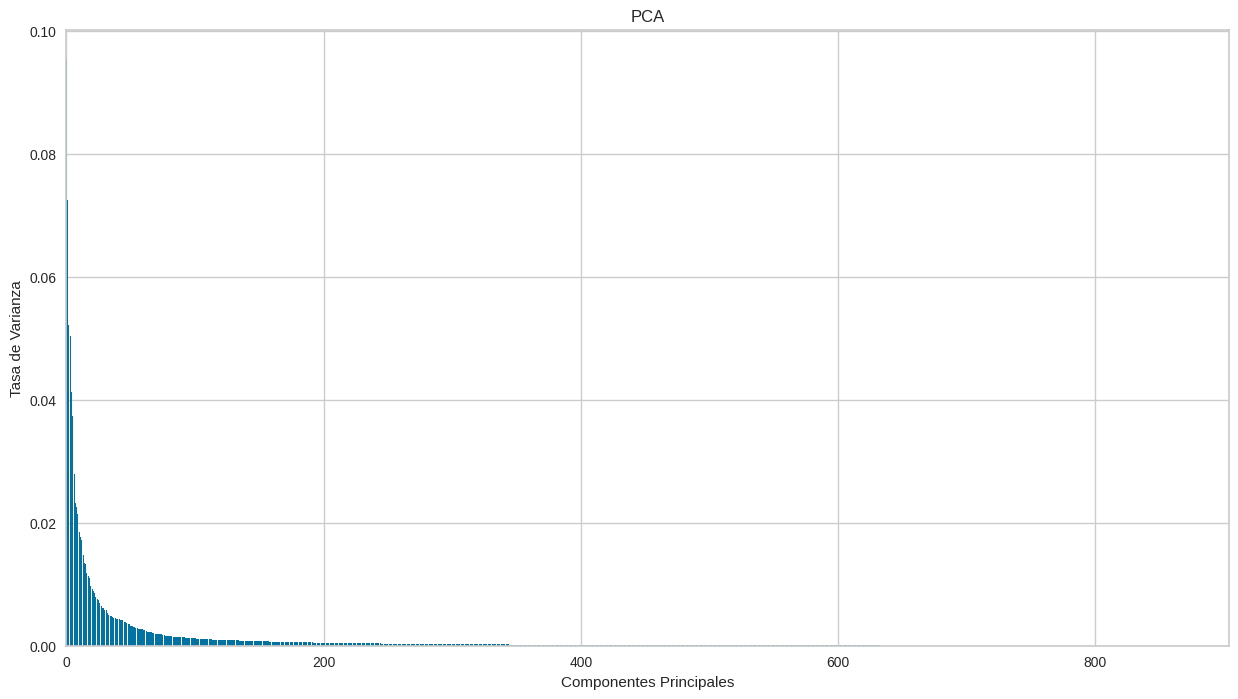

In [47]:
Varianza = pca.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las componentes principales

fig = plt.figure(figsize=(15,8))
plt.bar(np.arange(len(Varianza)), Varianza)
plt.xlabel('Componentes Principales')
plt.ylabel('Tasa de Varianza')
plt.title('PCA')
plt.xlim(0, len(Varianza))
plt.show()

In [48]:
Importancia_Componentes = pd.DataFrame(Varianza)
Importancia_Componentes = Importancia_Componentes.T
print("Porcentaje de Varianza detectada para las primeras 5 componentes: ", format(100*Importancia_Componentes.loc[:,0:4].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 10 componentes: ", format(100*Importancia_Componentes.loc[:,0:9].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 20 componentes: ", format(100*Importancia_Componentes.loc[:,0:19].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 40 componentes: ", format(100*Importancia_Componentes.loc[:,0:39].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 80 componentes: ", format(100*Importancia_Componentes.loc[:,0:79].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 160 componentes: ", format(100*Importancia_Componentes.loc[:,0:159].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 5 componentes:  [31.17243143]
Porcentaje de Varianza detectada para las primeras 10 componentes:  [44.42645608]
Porcentaje de Varianza detectada para las primeras 20 componentes:  [58.30427832]
Porcentaje de Varianza detectada para las primeras 40 componentes:  [70.77818255]
Porcentaje de Varianza detectada para las primeras 80 componentes:  [81.69395711]
Porcentaje de Varianza detectada para las primeras 160 componentes:  [89.83407912]


Observe que al seleccionar las 160 primeras componentes, se está representando casi el 90% de toda la información y a medida que se aumenta el número de componentes principales, se incrementa el porcentaje de toda la información, sin embargo aumenta muy poco.

In [49]:
Componentes_Seleccionadas = 160 

Tasa_Varianza_Explicada = np.sum(Varianza[0:Componentes_Seleccionadas])
Nuevas_Componentes = PCA(Tasa_Varianza_Explicada, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

X_Norm_PCA = Nuevas_Componentes.fit_transform(X_Norm) 

print('Tamaño de los datos originales con MinMax: ', X_Norm.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos: ', X_Norm_PCA.shape)  # Tamaño de los datos reducidos
print("Porcentaje de la varianza explicada con las componentes seleccionadas: {:.2f}%".format(Tasa_Varianza_Explicada*100))

Tamaño de los datos originales con MinMax:  (222006, 904)
Tamaño de los datos reducidos:  (222006, 160)
Porcentaje de la varianza explicada con las componentes seleccionadas: 89.83%


In [50]:
X_dim = X_Norm_PCA.copy()

##CLUSTERING

A partir del item anterior, se desea obtener el mejor agrupamiento de datos. Para esta tarea, se propone hacer una comparación entre:

1.   Agrupamiento de datos con los datos limpios del item "Exploración de Datos".
2.   Agrupamiento de datos con los datos reducidos del item "Reducción de Dimensionalidad".

*  X_limpios : Datos codificados, normalizados y sin outliers (Caracteristicas 
originales)
*  X_comp : Datos representados a traves de componentes

In [51]:
X_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222006 entries, 0 to 222005
Columns: 904 entries, Cant. pedida to Ciudad_980.0
dtypes: float64(904)
memory usage: 1.5 GB


In [52]:
columnas = []
for i in range(1,161):
  columnas.append(f'Comp_{i}')

In [53]:
X_comp = pd.DataFrame(data=X_dim, columns=columnas)

In [54]:
X_comp.head()

,Comp_1,Comp_2,Comp_3,Comp_4,Comp_5,Comp_6,Comp_7,Comp_8,Comp_9,Comp_10,...,Comp_151,Comp_152,Comp_153,Comp_154,Comp_155,Comp_156,Comp_157,Comp_158,Comp_159,Comp_160
0,-0.271121,0.016497,0.974090,-0.079179,-0.026857,-0.344674,0.196263,-0.118576,-0.069813,0.167089,...,0.003021,-0.001384,0.010343,-0.005701,0.014040,-0.018197,0.009413,0.000121,0.008561,0.003664
1,-0.278054,-0.025979,0.580637,-0.084003,0.020910,-0.195421,0.197398,0.284839,0.069089,0.073972,...,0.006028,0.003456,-0.003291,-0.000084,-0.007981,-0.002436,-0.002078,-0.017250,0.001446,-0.005474
2,-0.311275,-0.052440,-0.348697,0.045559,0.020690,-0.399928,0.203453,0.038160,-0.043366,0.072407,...,0.004690,0.013480,-0.013541,-0.010738,0.005182,-0.012920,0.020364,0.000057,-0.017919,-0.038961
3,-0.370904,-0.001007,-0.439594,-0.091424,0.258618,0.614677,0.233211,0.036453,0.019081,0.128469,...,0.005502,0.015178,-0.001869,-0.008073,0.010888,-0.016002,0.000593,-0.008829,0.002396,0.015483
4,-0.323135,-0.015157,0.449936,-0.217295,0.243915,0.760980,0.208113,0.206734,-0.053343,0.046113,...,-0.007786,-0.003264,-0.010869,-0.010211,0.013710,-0.028562,-0.004117,-0.012389,0.003531,0.012043


CREAR SOLO 2 CLUSTER


In [55]:
Numero_Clusters = 2
error = 1e-4
max_iteraciones = 1000

Modelo_Kmeans_X_limpios = KMeans(n_clusters = Numero_Clusters, max_iter = max_iteraciones, 
                       tol = error,random_state = 17)
Modelo_Kmeans_X_comp = KMeans(n_clusters = Numero_Clusters, max_iter = max_iteraciones, 
                       tol = error,random_state = 17)
Modelo_Kmeans_X_limpios.fit(X_limpios) # Experimento 1: Agrupar con los datos originales normalizados (caracteristicas)
Modelo_Kmeans_X_comp.fit(X_comp) # Experimento 2: Agrupar a traves de las componentes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=2, random_state=17)

In [56]:
# Vamos a usar K-Means y a extraer los vectores de clases de cada modelo

Clases_X_limpios = Modelo_Kmeans_X_limpios.labels_
Clases_X_comp = Modelo_Kmeans_X_comp.labels_

In [57]:
Clases_X_limpios

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [58]:
Clases_X_comp

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [59]:
centros_X_limpios = Modelo_Kmeans_X_limpios.cluster_centers_
centros_X_comp = Modelo_Kmeans_X_comp.cluster_centers_

In [60]:
centros_X_limpios.shape

(2, 904)

In [61]:
centros_X_comp.shape

(2, 160)

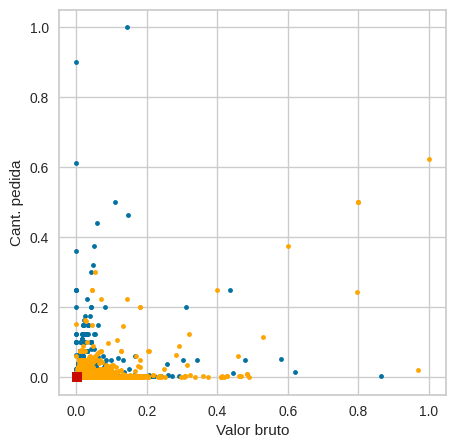

In [62]:
# Experimento 1:  DATOS LIMPIOS SIN REDUCCION DE DIMENSIONALIDAD

x_1 = X_limpios['Valor bruto']
x_2 = X_limpios['Cant. pedida']
colors = ["b", "orange"]
fig = plt.figure(figsize = (5,5))

for j in range(Numero_Clusters):
    plt.plot(x_1[Clases_X_limpios == j], x_2[Clases_X_limpios == j], '.', color = colors[j])

for pt in centros_X_limpios:
    plt.plot(pt[0],pt[1],'rs') # r = rojo; s = square

plt.xlabel("Valor bruto")
plt.ylabel("Cant. pedida")
plt.show()

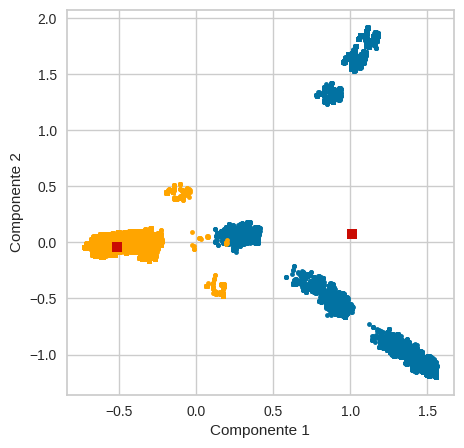

In [63]:
# Experimento 1:  COMPONENTES REDUCIDAS (160)

x_1 = X_comp['Comp_1']
x_2 = X_comp['Comp_2']
colors = ["b", "orange"]
fig = plt.figure(figsize = (5,5))

for j in range(Numero_Clusters):
    plt.plot(x_1[Clases_X_comp == j], x_2[Clases_X_comp == j], '.', color = colors[j])

for pt in centros_X_comp:
    plt.plot(pt[0],pt[1],'rs') # r = rojo; s = square

plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

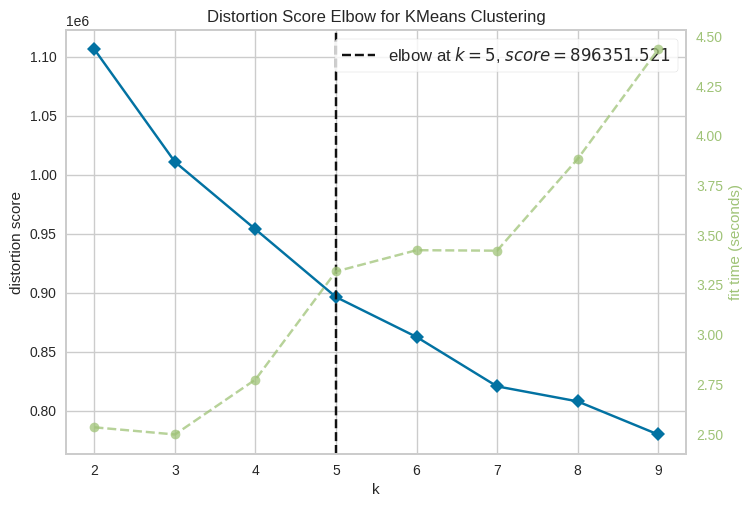

In [64]:
fig, ax = plt.subplots()
Codo = KElbowVisualizer(KMeans(max_iter = max_iteraciones, tol = error, random_state = 17), 
                              k = (2,10), ax = ax)
Codo.fit(X_comp)
ax.set_xticks(range(2,10))
Codo.show()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.13715470980898747


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.1455841246804726


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.15656889786991357


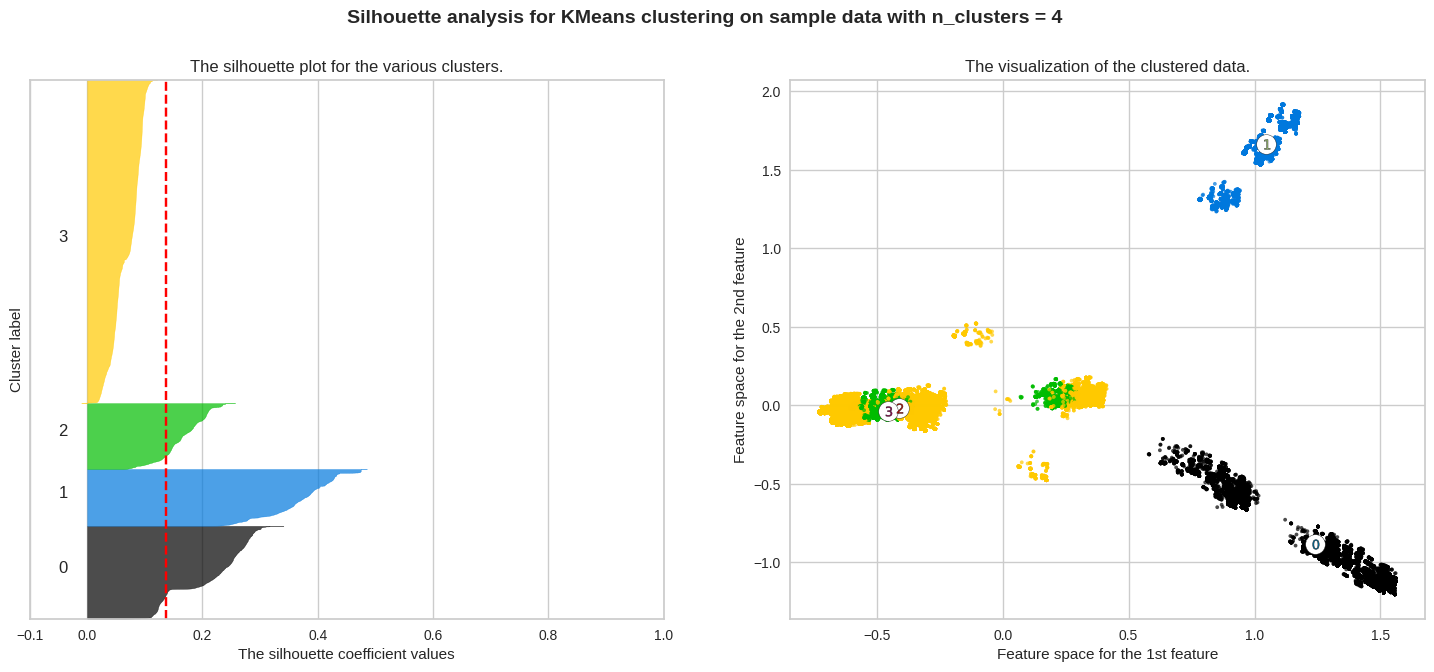

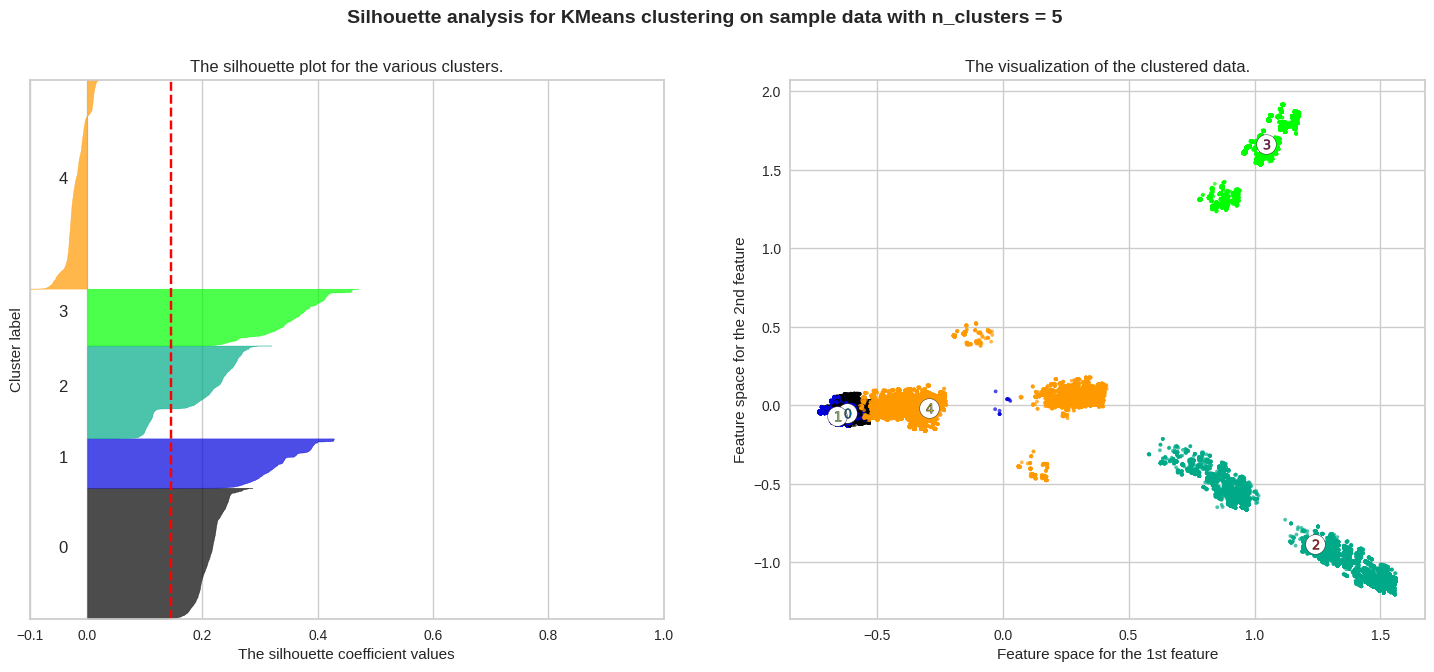

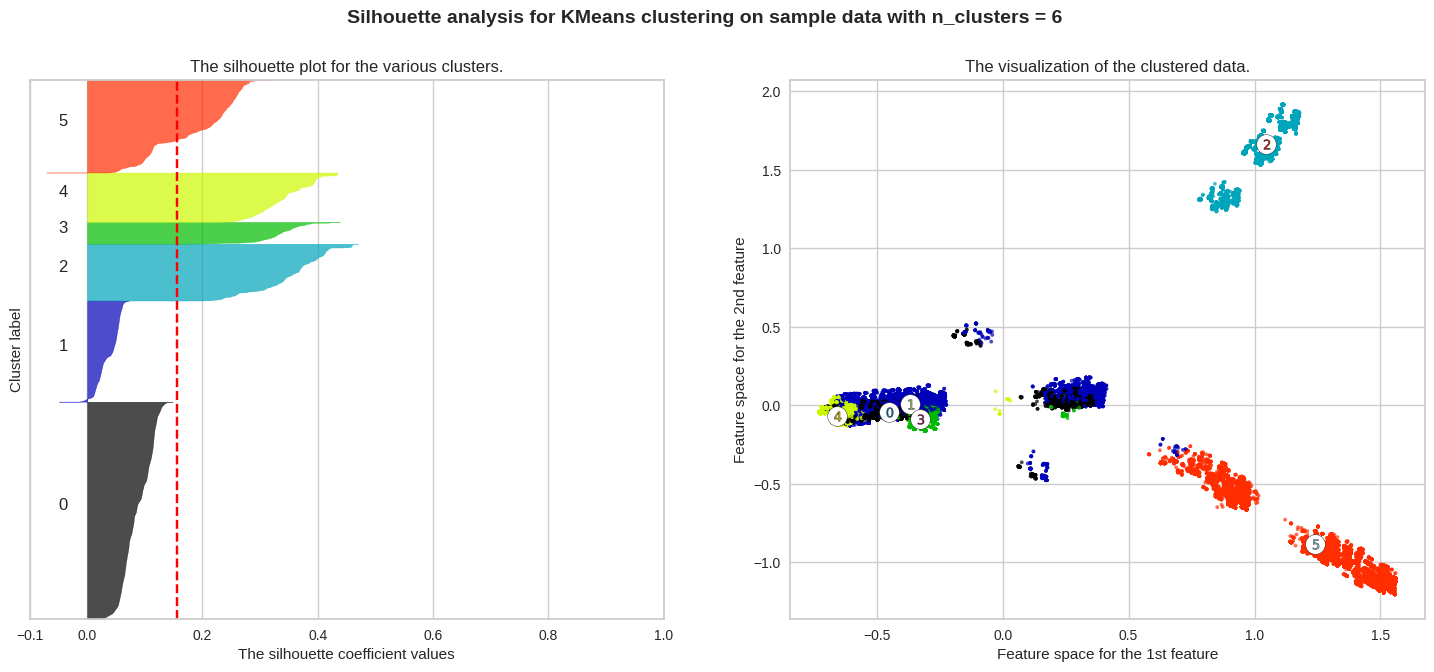

In [77]:
#For k-means, calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.

range_n_clusters = [4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_comp) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    clusterer.fit(X_comp)
    cluster_labels = clusterer.predict(X_comp)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_comp, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_comp, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_comp.iloc[:, 0], X_comp.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()